#     Diagnostic for Heart Disease with Machine Learning (ML) 
## by:  Steven Smiley

# Table of Contents (TOC)

* [0: Purpose](#Code_Objective_0)
* [1: Background](#Code_Objective_1)
* [2: Approach](#Code_Objective_2)
* [3: Import Libraries:](#Code_Objective_3)
* [4: Import and View Data:](#Code_Objective_4)
* [5: Split Data for Training:](#Code_Objective_5)
* [6: Machine Learning:](#Code_Objective_6)
    * [6.1: Machine Learning Models: Gradient Boosting:](#Code_Objective_6.1)
    * [6.2: Machine Learning Models: Random Forest:](#Code_Objective_6.2)
    * [6.3: Machine Learning Models: Support Vector Machine:](#Code_Objective_6.3)
    * [6.4: Machine Learning Models: Extra Random Forest:](#Code_Objective_6.4)
    * [6.5: Machine Learning Models: Logistic Regression:](#Code_Objective_6.5)
    * [6.6: Machine Learning Models: Multilayer Perceptron:](#Code_Objective_6.6)
* [7: Evaluate Models:](#Code_Objective_7)
* [8: Results & Conclusions:](#Code_Objective_8)
* [9: References:](#Code_Objective_9)

# 0. Purpose: <a class="anchor" id="Code_Objective_0"></a>

The purpose of this Jupyter notebook is to investigate different potential supervised Machine Learning (ML) algorithms for creating binary classification models that could serve as diagnostics for heart disease.  

The heart disease dataset used in this analysis comes from the Cleveland dataset[1,2,3,4,5](#Ref_1)

The hyperparameters used in this analysis come from the recommendations by Dr. Olson,  
* “Data-driven advice for applying machine learning to bioinformatics problems.” [6](#Ref_6)

The libraries and coding packages used in this analysis are:
* SciPy[7](#Ref_7)


* Python[8](#Ref_8)


* NumPy[9](#Ref_9)


* IPython[10](#Ref_10)


* Matplotlib[11](#Ref_11)


* Pandas[12](#Ref_12)


* Scikit-Learn [13](#Ref_13) 


* Scikit-Image [14](#Ref_14)

# 1. Background:<a class="anchor" id="Code_Objective_1"></a>

### Background on Cleveland dataset
Creators of the Cleveland dataset: 

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. [2](#Ref_2) 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.[3](#Ref_3)
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. [4](#Ref_4)  
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. [5](#Ref_5)


Dataset Information:

The database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "num" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

Attribute Information:

Only 14 attributes used: 
1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute) 


### Background on what is new today
A recent publication by [Randal S. Olson](http://www.randalolson.com), et al. in 2017 provides insightful best practice advice for solving bioinformatic problems with machine learning, [“Data-driven Advice for Applying Machine Learning to Bioinformatics Problems”](https://arxiv.org/abs/1708.05070).  

Looking at the abstract briefly, they analyzed “13 state-of-the-art, commonly used machine learning algorithms on a set of 165 publicly available classification problems in order to provide data-driven algorithm recommendations to current researchers.”  

Interesting enough, they did not look at this dataset, which is cool because that means we are exploring unmarked territory with his recommendations (see [Table 2](https://arxiv.org/abs/1708.05070) in their paper).  

From their research, they were able to provide a “recommendation of five algorithms with hyperparameters that maximize classifier performance across the tested problems, as well as general guidelines for applying machine learning to supervised classification problems.”  These recommendations are summarized below as follows:

|#| Algorithm | Parameters | Datasets Covered |
|-|--------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1| [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) | loss = `deviance`| 51|
|||learning_rate = 0.1||
|||n_estimators=500||
|||max_depth=3||
|||max_features='log2'||
|2| [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) | n_estimators=500| 19|
|||max_features=0.25||
|||criterion='entropy'||
|3| [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) | C=0.01| 16|
|||gamma=0.1||
|||kernel="poly"||
|||degree=3||
|||coef0=10.0||
|4| [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) | n_estimators=1000| 12|
|||max_features='log2'|
|||criterion='entropy'|
|5| [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) | C=1.5| 8|
|||penalty='l1'|
|||fit_intercept=True|

Therefore, I thought it would be an interesting project to code these same 5 recommendations with [scikit-learn]( https://scikit-learn.org/stable/user_guide.html#user-guide) and implement them with tuning the hyperparameters. 


# 2. Approach:<a class="anchor" id="Code_Objective_2"></a>

The Data was split into 80% training (237 people) and 20% testing (60 people) after we dropped 6 from missing values.
  
Several different models were evaluated through k-fold Cross-Validation with k-fold = 10 using GridSearchCV, which iterates on different algorithm's hyperparameters:
  1. Gradient Tree Boosting (GradientBoostingClassifier) 'In top 5 from Olson'  
  2. Random Forest (RandomForestClassifier) 'In top 5 from Olson' 
  3. Support Vector Machine (SVC) 'In top 5 from Olson' 
  4. Extra Random Forest (ExtraTreesClassifier) 'In top 5 from Olson' 
  5. Logistic Regression (LogisticRegression) 'In top 5 from Olson' 
  6. Multilayer Perceptron (MLPClassifier) 'NOT analzyed by Olson'

|#| Algorithm | Parameters |  ||  | New Parameters 
|-|--------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|-|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1| [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) | loss = `deviance`| |
|||learning_rate = 0.1||||learning_rate = 0.01, 1
|||n_estimators=500||
|||max_depth=3||||max_depth=1
|||max_features='log2'||
|2| [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) | n_estimators=500| |||n_estimators=1000
|||max_features=0.25||
|||criterion='entropy'||
|3| [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) | C=0.01| |||C=1, 10
|||gamma=0.1||
|||kernel="poly"||||kernel='linear','rbf'
|||degree=3||
|||coef0=10.0||
|4| [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) | n_estimators=1000| |
|||max_features='log2'||||max_features=0.25
|||criterion='entropy'|
|5| [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) | C=1.5| |||C=0.001,0.01,0.1,1,10,100,1000
|||penalty='l1'|
|||fit_intercept=True|
|6| [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) | ||||hidden_layer_sizes=100| |
|||||||activation='relu','tanh','logistic'|
|||||||learning_rate='constant','invscaling','adaptive'| 




# 3. Import Libraries <a class="anchor" id="Code_Objective_3"></a>

In [1]:
## Algorithms
#1
from sklearn.ensemble import GradientBoostingClassifier

#2
from sklearn.ensemble import RandomForestClassifier

#3
from sklearn.svm import SVC

#4
from sklearn.ensemble import ExtraTreesClassifier

#5
from sklearn.linear_model import LogisticRegression

#6
from sklearn.neural_network import MLPClassifier

## Sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc #plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
import pandas as pd # data processing, CSV file I/O (e.i. pd.read_csv)

## Numpy
import numpy as np

## Misc
import warnings
import os # Get Current Directory
import joblib
from time import time
from scipy import stats
import itertools
import subprocess

## Hide Warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('mode.chained_assignment', None)

## Get Current Directory

In [3]:
currentDirectory=os.getcwd()
print(currentDirectory)

/Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1


## Make Directorys for Output Files

#### Function: folder_path

In [4]:
def folder_path(path):
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
        return(path)
    else:
        print ("Successfully created the directory %s " % path)
        return(path)
    return(path)

In [5]:
# OUTPUTS: Folder for storing OUTPUTS
OUTPUT_path=folder_path(currentDirectory+'/Outputs')

# Models: Folder for storing models
models_path=folder_path(OUTPUT_path+'/Models')
# Figures: Folder for storing figures
figures_path=folder_path(OUTPUT_path+'/Figures')

Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Figures 


# 4. Import and View Data <a class="anchor" id="Code_Objective_4"></a>

Features:
1. #### age: 'Age'
    * age
        * continuous: units age= years
        

2. #### sex: 'Sex'
     * sex
         * categorical: units = #        
                1=male
                0=female
        
3. #### cp: 'Chest Pain Type'
     * chest pain type
         * categorical: units = #        
                1 = typical angina
                2 = atypical angina
                3 = non-anginal pain
                4 = asymptomatic
        
        
4. #### trestbps: 'Resting Blood Pressure'
    * resting blood pressure
        (on admission to the hospital
        * continuous: units = mmHg
        
5. #### chol: 'Serum Cholesterol'
    * serum cholestoral 
        * continuous: units = mg/dl
        
6. #### fbs: 'Fasting Blood Sugar'
    * fasting blood sugar > 120mg/dl
        * categorical:  units = #                        
               1=true
               0=false
        
7. #### restecg: 'Resting Electrocardiographic'
    * resting electrocardiographic results
        * categorical: units = #           
               0 = normal
               1 = ST-T wave abnormal
               2 = left ventricular hypertrophy Estes)
        
8. #### thalach: 'Exercise Max Heart Rate Achieved'
    * maximum heart rate achieved
        * continuous: units = bpm
    
        
9. #### exang: 'Exercise Induced Angina'
    * exercise induced angina
        * categorical: units = #  
                1=yes
                0=no
        
10. #### oldpeak: 'ST depression induced by Exercise relative to Rest'
    * ST depression induced by exercise relative to rest
        * continuous: units = #
        
11. #### slope: 'Slope of Peak Exercise ST Segment'
    * the slope of the peak exercise ST segment
        * categorical: units = #           
                1=upsloping
                2=flat
                3=downsloping
        
12. #### ca: '# Major Vessels colored by Flouroscopy'
    * number of major vessels colored by flouroscopy
        * categorical: units = #   
                0= fluoroscopy color 0
                1= fluoroscopy color 1
                2= fluoroscopy color 2
                3= fluoroscopy color 3
        
13. #### tha: 'Thalassemia (norm.,fix. defect, revers. defect)'
    * Thalassemia
        * categorical: units = #  
                3= normal 
                6= fixed defect
                7= reversable defect)
        
14. #### diagnosis: 'diagnosis'
    * The diagnosis for heart disease 
        * categorical: units = #  
                0 = No Disease
               x > 0 = Disease
    

In [6]:
labels = ['Age',
          'Sex',
          'Chest Pain Type',
          'Resting Blood Pressure',
          'Serum Cholesterol',
          'Fasting Blood Sugar',
          'Resting Electrocardiographic',
          'Exercise Max Heart Rate Achieved',
          'Exercise Induced Angina',
          'ST depression induced by Exercise relative to Rest',
          'Slope of Peak Exercise ST Segment',
          '# Major Vessels colored by Flouroscopy',
          'Thalassemia (norm.,fix. defect, revers. defect)',
          'diagnosis']

In [7]:
try:
    data= pd.read_csv('Inputs/processed.cleveland.data',names=labels)
except OSError:
    print ("Input file not found at location:",'processed.cleveland.data')
    INPUT_path=currentDirectory+'/Inputs'
    data_path=os.path.join(INPUT_path,'Inputs/procssed.cleveland.data')
    data= pd.read_csv(data_path,names=labels)
    print ("Successfully loaded Input file from:",data_path)
else:
    print ("Successfully loaded Input file from:",'processed.cleveland.data')


data.head(10) # view the first 10 rows

Successfully loaded Input file from: processed.cleveland.data


,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic,Exercise Max Heart Rate Achieved,Exercise Induced Angina,ST depression induced by Exercise relative to Rest,Slope of Peak Exercise ST Segment,# Major Vessels colored by Flouroscopy,"Thalassemia (norm.,fix. defect, revers. defect)",diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [8]:
# Change num values > 0 to 1 for a Diagnosis 
data['diagnosis'] = np.where((data['diagnosis']>0),1,0)

In [9]:
data.info() # view 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                                                   303 non-null float64
Sex                                                   303 non-null float64
Chest Pain Type                                       303 non-null float64
Resting Blood Pressure                                303 non-null float64
Serum Cholesterol                                     303 non-null float64
Fasting Blood Sugar                                   303 non-null float64
Resting Electrocardiographic                          303 non-null float64
Exercise Max Heart Rate Achieved                      303 non-null float64
Exercise Induced Angina                               303 non-null float64
ST depression induced by Exercise relative to Rest    303 non-null float64
Slope of Peak Exercise ST Segment                     303 non-null float64
# Major Vessels colored by Flouroscopy                303 non-null obj

There is two categories of `object`
Therefore, we want to see what is unique in them.

We see that there are instances of `?`

In [10]:
data['# Major Vessels colored by Flouroscopy'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

We want to see how many

In [11]:
sum(data['# Major Vessels colored by Flouroscopy'].values=='?')

4

This is not a significant amount of the observations.  So we will remove those observations.

In [12]:
droplist=data.loc[data['# Major Vessels colored by Flouroscopy']=='?'].index.tolist()

In [13]:
data.drop(droplist,axis=0,inplace=True)

In [14]:
data['# Major Vessels colored by Flouroscopy']=data['# Major Vessels colored by Flouroscopy'].astype(str).astype(float).astype(int)

We explore another variable that had `?` values for the same approach.

In [15]:
data['Thalassemia (norm.,fix. defect, revers. defect)'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

We see that there are only a couple instances.

In [16]:
sum(data['Thalassemia (norm.,fix. defect, revers. defect)'].values=='?')

2

We drop them as well because they do not take a significant amount of the data.

In [17]:
droplist=data.loc[data['Thalassemia (norm.,fix. defect, revers. defect)']=='?'].index.tolist()

In [18]:
data.drop(droplist,axis=0,inplace=True)

In [19]:
data['Thalassemia (norm.,fix. defect, revers. defect)']=data['Thalassemia (norm.,fix. defect, revers. defect)'].astype(str).astype(float).astype(int)

We verify that all of our data is floating or integer values

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age                                                   297 non-null float64
Sex                                                   297 non-null float64
Chest Pain Type                                       297 non-null float64
Resting Blood Pressure                                297 non-null float64
Serum Cholesterol                                     297 non-null float64
Fasting Blood Sugar                                   297 non-null float64
Resting Electrocardiographic                          297 non-null float64
Exercise Max Heart Rate Achieved                      297 non-null float64
Exercise Induced Angina                               297 non-null float64
ST depression induced by Exercise relative to Rest    297 non-null float64
Slope of Peak Exercise ST Segment                     297 non-null float64
# Major Vessels colored by Flouroscopy                297 non-null int

## 4.1 Import and View Data:  Check for Missing Values

We want to look for any null values. None are observed in this dataset.

In [21]:
data.isnull().sum()

Age                                                   0
Sex                                                   0
Chest Pain Type                                       0
Resting Blood Pressure                                0
Serum Cholesterol                                     0
Fasting Blood Sugar                                   0
Resting Electrocardiographic                          0
Exercise Max Heart Rate Achieved                      0
Exercise Induced Angina                               0
ST depression induced by Exercise relative to Rest    0
Slope of Peak Exercise ST Segment                     0
# Major Vessels colored by Flouroscopy                0
Thalassemia (norm.,fix. defect, revers. defect)       0
diagnosis                                             0
dtype: int64

In [22]:
# Verify Data Changes, look at first 5 rows 
data.head(5)

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting Electrocardiographic,Exercise Max Heart Rate Achieved,Exercise Induced Angina,ST depression induced by Exercise relative to Rest,Slope of Peak Exercise ST Segment,# Major Vessels colored by Flouroscopy,"Thalassemia (norm.,fix. defect, revers. defect)",diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,6,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,3,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,7,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,3,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,3,0


## Feature Engineering: Categorical Encoding
We want to change our categorical values to their own unique binary output 

#### Feature Engineering: Categorical Encoding: tha
13. #### tha: 'Thalassemia (norm.,fix. defect, revers. defect)'
    * Thalassemia
        * categorical: units = #  
                3= normal 
                6= fixed defect
                7= reversable defect)

In [23]:
data['Thalassemia: normal']=np.where((data['Thalassemia (norm.,fix. defect, revers. defect)']==3), 1, 0)
data['Thalassemia: fixed defect']=np.where((data['Thalassemia (norm.,fix. defect, revers. defect)']==6), 1, 0)
data['Thalassemia: reversable defect']=np.where((data['Thalassemia (norm.,fix. defect, revers. defect)']==7), 1, 0)
data.drop(['Thalassemia (norm.,fix. defect, revers. defect)'],axis=1,inplace=True)

#### Feature Engineering: Categorical Encoding: ca
12. #### ca: '# Major Vessels colored by Flouroscopy'
    * number of major vessels colored by flouroscopy
        * categorical: units = #   
                0= fluoroscopy color 0
                1= fluoroscopy color 1
                2= fluoroscopy color 2
                3= fluoroscopy color 3

In [24]:
data['Major Vessels F. Colored: 0']=np.where((data['# Major Vessels colored by Flouroscopy']==0), 1, 0)
data['Major Vessel F. Colored: 1']=np.where((data['# Major Vessels colored by Flouroscopy']==1), 1, 0)
data['Major Vessels F. Colored: 2']=np.where((data['# Major Vessels colored by Flouroscopy']==2), 1, 0)
data['Major Vessels F. Colored: 3']=np.where((data['# Major Vessels colored by Flouroscopy']==3), 1, 0)
data.drop(['# Major Vessels colored by Flouroscopy'],axis=1,inplace=True)

#### Feature Engineering: Categorical Encoding: slope
11. #### slope: 'Slope of Peak Exercise ST Segment'
    * the slope of the peak exercise ST segment
        * categorical: units = #           
                1=upsloping
                2=flat
                3=downsloping

In [25]:
data['Upslopping for Peak Exercise ST Segment']=np.where((data['Slope of Peak Exercise ST Segment']==1), 1, 0)
data['Flat for Peak Exercise ST Segment']=np.where((data['Slope of Peak Exercise ST Segment']==2), 1, 0)
data['Downslopping for Peak Exercise ST Segment']=np.where((data['Slope of Peak Exercise ST Segment']==3), 1, 0)
data.drop(['Slope of Peak Exercise ST Segment'],axis=1,inplace=True)

#### Feature Engineering: Categorical Encoding: restecg
7. #### restecg: 'Resting Electrocardiographic'
    * resting electrocardiographic results
        * categorical: units = #           
               0 = normal
               1 = ST-T wave abnormal
               2 = left ventricular hypertrophy Estes)
        

In [26]:
data['Resting Electrocardiographic: normal']=np.where((data['Resting Electrocardiographic']==0), 1, 0)
data['Resting Electrocardiographic: ST-T wave abnormal']=np.where((data['Resting Electrocardiographic']==1), 1, 0)
data['Resting Electrocardiographic: left ventricular hypertrophy']=np.where((data['Resting Electrocardiographic']==2), 1, 0)
data.drop(['Resting Electrocardiographic'],axis=1,inplace=True)

#### Feature Engineering: Categorical Encoding: cp
3. #### cp: 'Chest Pain Type'
     * chest pain type
         * categorical: units = #        
                1 = typical angina
                2 = atypical angina
                3 = non-anginal pain
                4 = asymptomatic

In [27]:
data['Chest Pain Type: typical angina']=np.where((data['Chest Pain Type']==1), 1, 0)
data['Chest Pain Type: atypical angina']=np.where((data['Chest Pain Type']==2), 1, 0)
data['Chest Pain Type: non-anginal pain']=np.where((data['Chest Pain Type']==3), 1, 0)
data['Chest Pain Type: asymptomatic']=np.where((data['Chest Pain Type']==4), 1, 0)
data.drop(['Chest Pain Type'],axis=1,inplace=True)

In [28]:
data.head()

,Age,Sex,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Exercise Max Heart Rate Achieved,Exercise Induced Angina,ST depression induced by Exercise relative to Rest,diagnosis,Thalassemia: normal,...,Upslopping for Peak Exercise ST Segment,Flat for Peak Exercise ST Segment,Downslopping for Peak Exercise ST Segment,Resting Electrocardiographic: normal,Resting Electrocardiographic: ST-T wave abnormal,Resting Electrocardiographic: left ventricular hypertrophy,Chest Pain Type: typical angina,Chest Pain Type: atypical angina,Chest Pain Type: non-anginal pain,Chest Pain Type: asymptomatic
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,0,...,0,0,1,0,0,1,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1,1,...,0,1,0,0,0,1,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,1,...,0,0,1,1,0,0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,0,0,1,0,1,0,0


We want to see how the data looks with Histogram plots. 

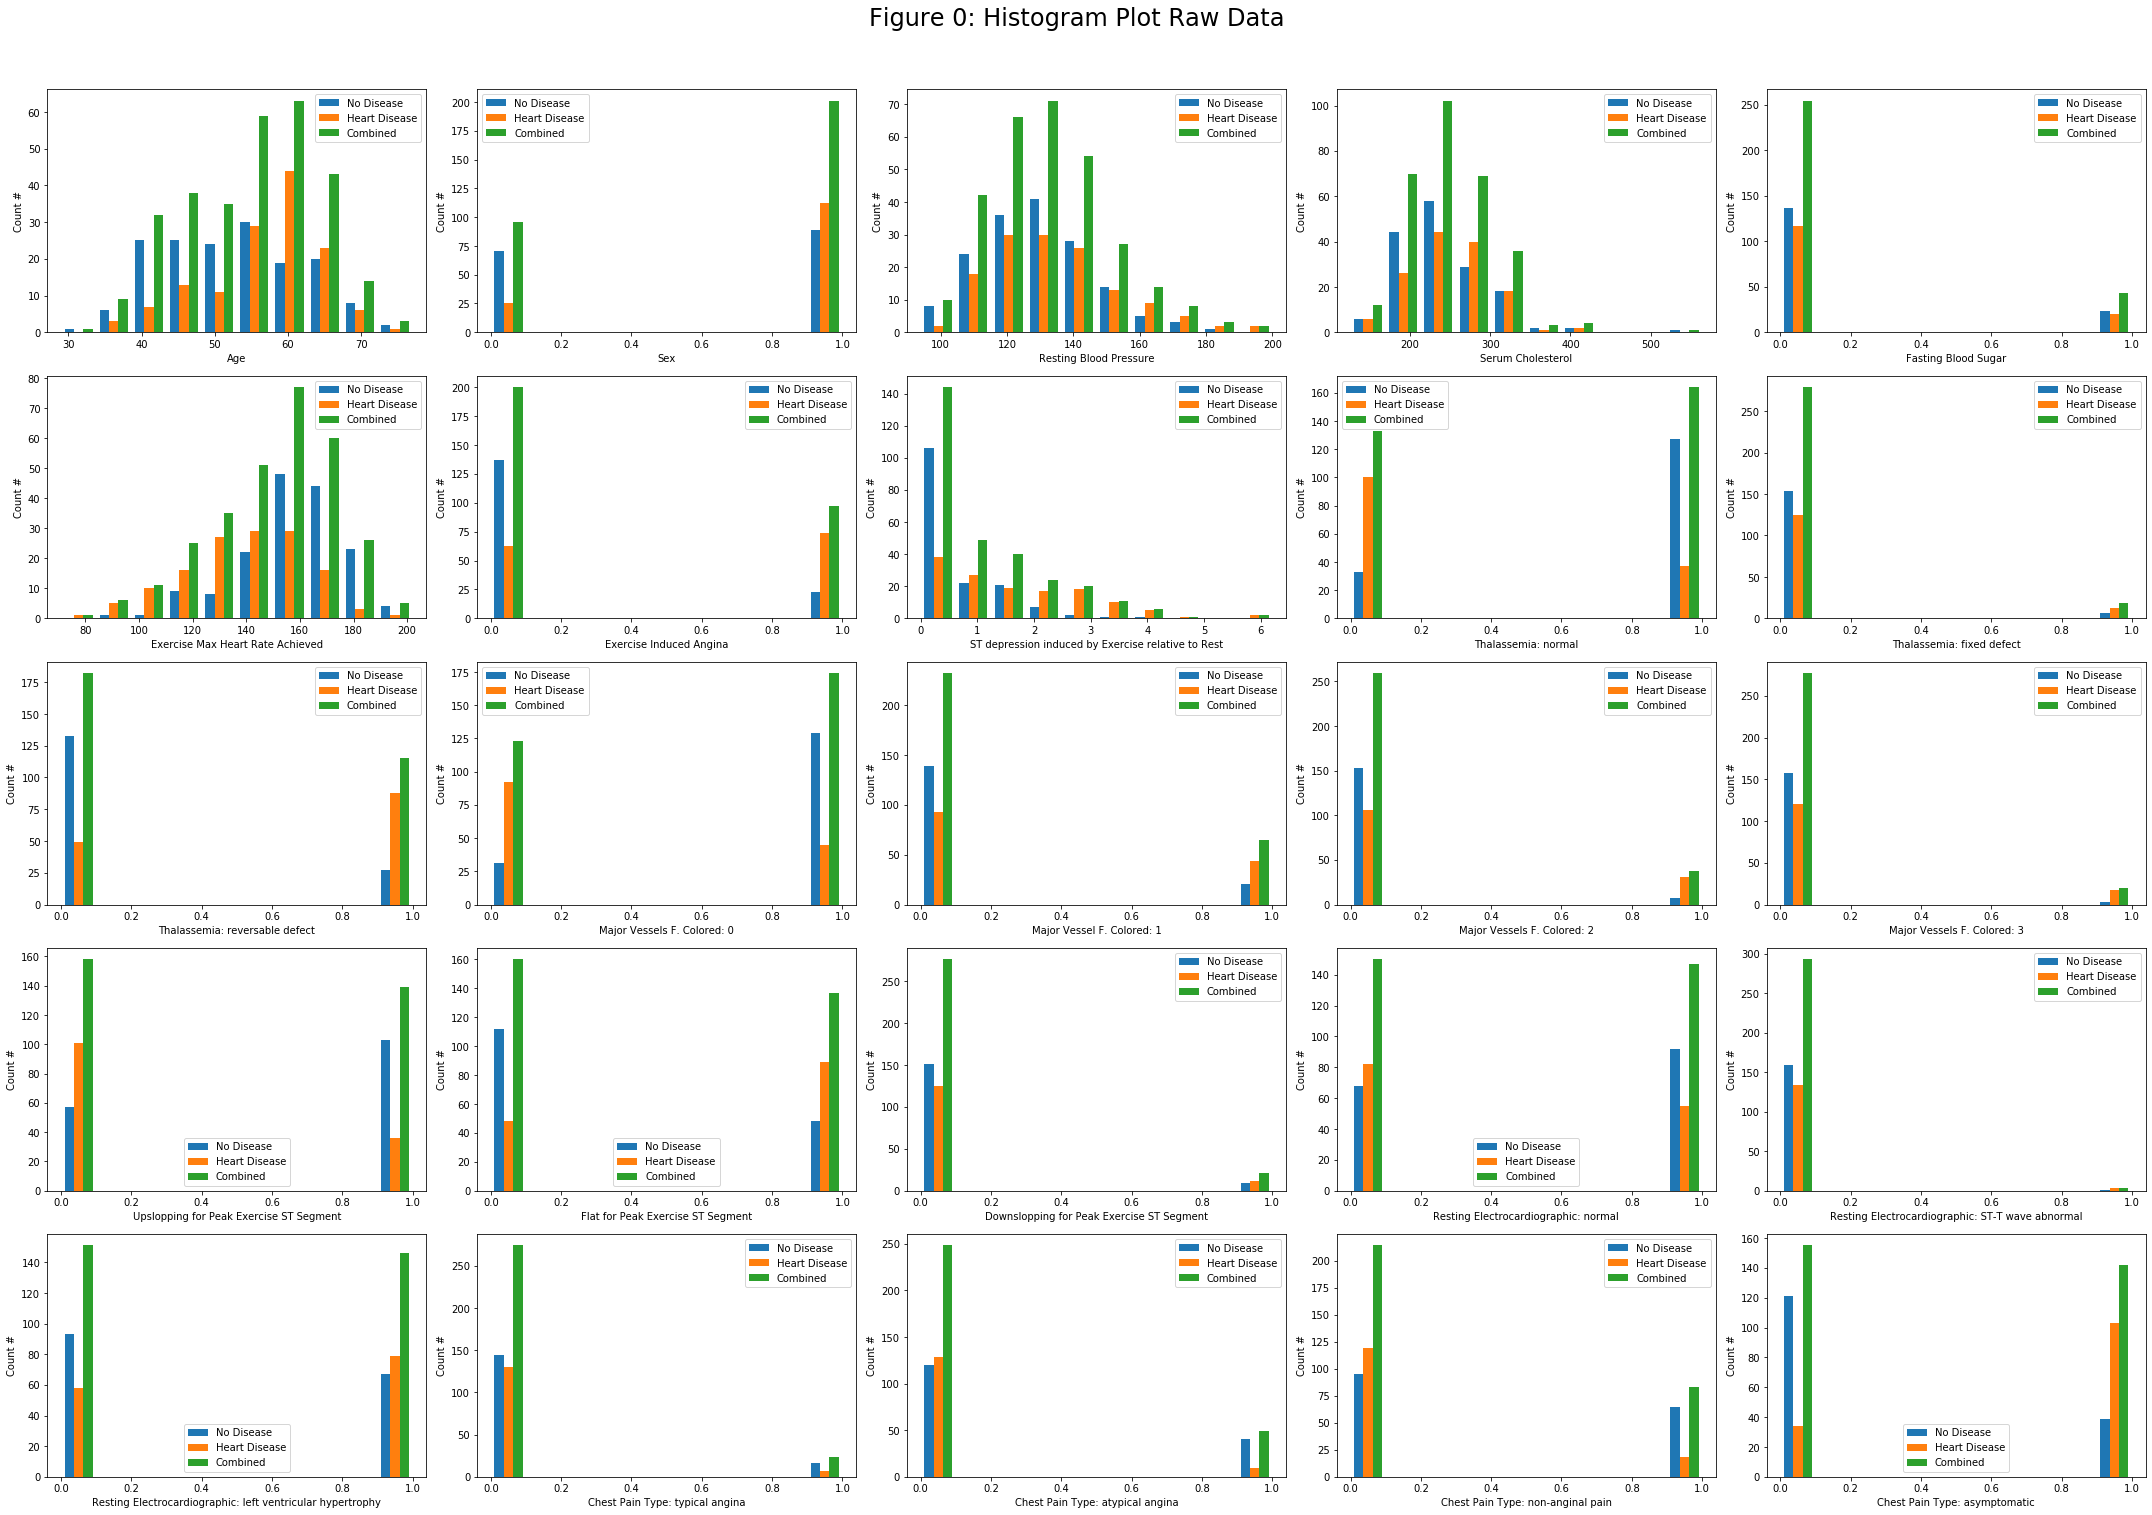

In [29]:
DropList=['diagnosis']
sqrt_length=round(len(list(data.drop(DropList,axis=1)))**(1/2))
ncols=sqrt_length
nrows=sqrt_length
fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=[30,20])
fig.suptitle('Figure 0: Histogram Plot Raw Data', y=1.05, fontsize=24)
fig.tight_layout()

#axes[-1,(i+1)*-1].axis('off')
slog_train = data['diagnosis'] == 1
for name, ax in zip(list(data.drop(['diagnosis'],axis=1)),axes.flat):
    x1=data[~slog_train][name]
    x2=data[slog_train][name]
    x3=data[name]
    labels=['No Disease','Heart Disease','Combined']
    ax.hist([x1,x2,x3],label=labels)
    ax.legend()
    ax.set_xlabel(name)
    ax.set_ylabel('Count #')
    plt.tight_layout()
histplot_fig = os.path.join(figures_path,'Figure 0.Histogram Plot Raw Data.png')
plt.savefig(histplot_fig,dpi=300,bbox_inches='tight')

In [30]:
Xy=data.copy()

In [31]:
Xy.head()

,Age,Sex,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Exercise Max Heart Rate Achieved,Exercise Induced Angina,ST depression induced by Exercise relative to Rest,diagnosis,Thalassemia: normal,...,Upslopping for Peak Exercise ST Segment,Flat for Peak Exercise ST Segment,Downslopping for Peak Exercise ST Segment,Resting Electrocardiographic: normal,Resting Electrocardiographic: ST-T wave abnormal,Resting Electrocardiographic: left ventricular hypertrophy,Chest Pain Type: typical angina,Chest Pain Type: atypical angina,Chest Pain Type: non-anginal pain,Chest Pain Type: asymptomatic
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,0,...,0,0,1,0,0,1,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1,1,...,0,1,0,0,0,1,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,1,...,0,0,1,1,0,0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,0,0,1,0,1,0,0


In [32]:
data['diagnosis']

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: diagnosis, Length: 297, dtype: int64

## 4.2  Heatmap with Pearson Correlation Coefficient  for Features
A strong correlation is indicated by a Pearson Correlation Coefficient value near 1.  Therefore, when looking at the Heatmap, we want to see what correlates most with the first column, "diagnosis."  It appears that the features of "Major Vessels F. Colored: 0" & "Thalassemia: normal" [0.24] has the strongest correlation with "diagnosis".  

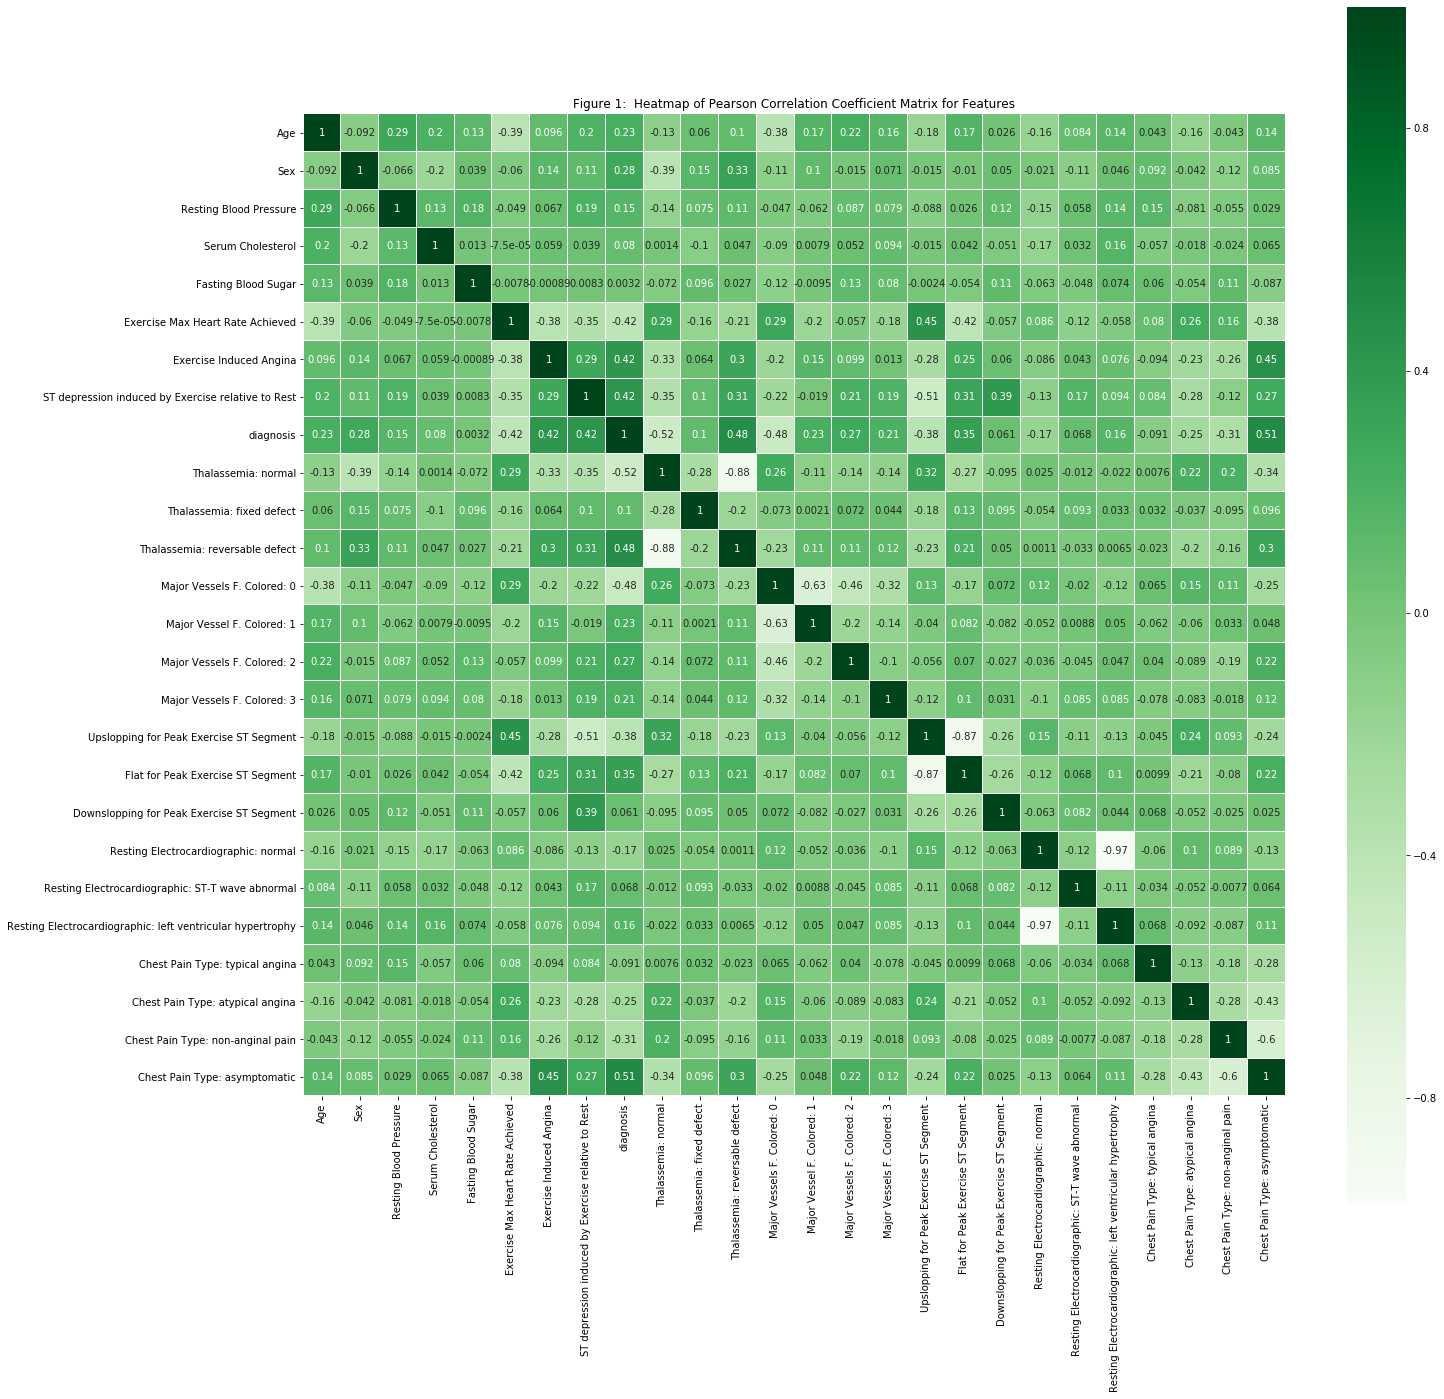

In [33]:
fix,ax = plt.subplots(figsize=(22,22))
heatmap_data = Xy
sns.heatmap(heatmap_data.corr(),vmax=1,linewidths=0.01,
            square=True,annot=True,linecolor="white", cmap='Greens')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
heatmap_title='Figure 1:  Heatmap of Pearson Correlation Coefficient Matrix for Features'
ax.set_title(heatmap_title)
heatmap_fig=os.path.join(figures_path,'Figure1.Heatmap.png')
plt.savefig(heatmap_fig,dpi=300,bbox_inches='tight')
plt.show()

# 5.  Split Data for Training <a class="anchor" id="Code_Objective_5"></a>  

## Split the Data <a class="anchor" id="Code_Objective_5.1"></a>

A good rule of thumb is to hold out between 20 to 30 percent of the data for testing. 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['diagnosis'],axis=1)
                                                    , pd.DataFrame(data['diagnosis']), test_size= 0.2, random_state= 42) #withold 20% of data for testing

In [35]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

X_test=pd.DataFrame(X_test)
y_test=pd.DataFrame(y_test)

## Scale the Data 

In [36]:
#Scale Data
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train.values)
X_train = pd.DataFrame(X_train)
X_train.columns=(data.drop(['diagnosis'], axis= 1)).columns

X_test=scaler.transform(X_test.values)
X_test=pd.DataFrame(X_test)
X_test.columns=(data.drop(['diagnosis'],axis=1)).columns

## Verify the Split <a class="anchor" id="Code_Objective_5.2"></a>

Verify the data was split correctly

In [37]:
print('X_train - length:',len(X_train), 'y_train - length:',len(y_train))
print('X_test - length:',len(X_test),'y_test - length:',len(y_test))
print('Percent heldout for testing:', round(100*(len(X_test)/len(data)),0),'%')

X_train - length: 237 y_train - length: 237
X_test - length: 60 y_test - length: 60
Percent heldout for testing: 20.0 %


# 6. Machine Learning: <a class="anchor" id="Code_Objective_6"></a>

In order to find a good model, several algorithms are tested on the training dataset. A senstivity study using different Hyperparameters of the algorithms are iterated on with GridSearchCV in order optimize each model. The best model is the one that has the highest accuracy without overfitting by looking at both the training data and the validation data results. Computer time does not appear to be an issue for these models, so it has little weight on deciding between models.

## GridSearch CV

class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]¶

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Function: print_results

In [38]:
def print_results(Olson_params,results,name,filename_pr):
    with open(filename_pr, mode='w') as file_object:
        print(name,file=file_object)
        print(name)
        print('BEST PARAMS: {}\n'.format(results.best_params_),file=file_object)
        print('Olson PARAMS: {}\n'.format(Olson_params),file=file_object)
        print('BEST PARAMS: {}\n'.format(results.best_params_))
        print('Olson PARAMS: {}\n'.format(Olson_params))
        means = results.cv_results_['mean_test_score']
        stds = results.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, results.cv_results_['params']):
            print('{} {} (+/-{}) for {}'.format(name,round(mean, 3), round(std * 2, 3), params),file=file_object)
            print('{} {} (+/-{}) for {}'.format(name,round(mean, 3), round(std * 2, 3), params))

In [39]:
print(GridSearchCV)

<class 'sklearn.model_selection._search.GridSearchCV'>


# 6.1 Machine Learning Models:  Gradient Boosting <a class="anchor" id="Code_Objective_6.1"></a>

In [40]:
print(GradientBoostingClassifier())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Gradient Boosting: Hyperparameter used in GridSearchCV

#### HP1, loss: {‘deviance’, ‘exponential’}, optional (default=’deviance’)
loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
###### Details
Recommendation by Olson is `deviance`.
###### Values chosen
'loss': ['deviance'],

#### HP2, learning_rate:  float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
###### Details
Recommendation by Olson is `0.1`
###### Values chosen
'learning_rate': [0.01, 0.1, 1]

#### HP3, n_estimators:  int (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
###### Details
Recommendation by Olson is `500` 
###### Values chosen
'n_estimators': [500],

#### HP4, max_depth:  integer, optional (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
###### Details
Recommendation by Olson is `3`.
###### Values chosen
'max_depth': [1, 3],

#### HP5, max_features: int, float, string or None, optional (default=None)
The number of features to consider when looking for the best split:

* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* If “auto”, then max_features=sqrt(n_features).
* If “sqrt”, then max_features=sqrt(n_features).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.

Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
###### Details
Recommendation by Olson is `log2`.
###### Values chosen
'max_depth': ['log2'],

## Gradient Boosting: Code

In [41]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/GB')
path_Olson=folder_path(OUTPUT_path+'/Models/GB_Olson')

Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/GB 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/GB_Olson 


In [42]:
GB_Olson_model_dir=os.path.join(path_Olson,'GB_Olson_model.pkl')
GB_model_dir=os.path.join(path,'GB_model.pkl')
if os.path.exists(GB_model_dir) == False:
    Olson_gb_parameters = {
            'learning_rate': [0.1],
            'loss': ['deviance'],
            'max_depth': [3], 
            'max_features': ['log2'],
            'n_estimators': [500],            
            }
    gb_Olson = GradientBoostingClassifier() 
    gb_Olson=GridSearchCV(gb_Olson,Olson_gb_parameters,cv=10)
    gb_Olson.fit(X_train,y_train.values.ravel())
    gb_Olson.best_estimator_
    joblib.dump(gb_Olson.best_estimator_,GB_Olson_model_dir)
    
    gb = GradientBoostingClassifier()   
    parameters = {
            'loss': ['deviance'],
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [500],
            'max_depth': [1,3],
            'max_features': ['log2']
            }
    cv=GridSearchCV(gb, parameters, cv=10)
    cv.fit(X_train, y_train.values.ravel())
    print_results(Olson_gb_parameters,cv,'Gradient Boost (GB)',os.path.join(path,'GR_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,GB_model_dir)
else:
    print('Already have GB') 

Gradient Boost (GB)
BEST PARAMS: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 500}

Olson PARAMS: {'learning_rate': [0.1], 'loss': ['deviance'], 'max_depth': [3], 'max_features': ['log2'], 'n_estimators': [500]}

Gradient Boost (GB) 0.827 (+/-0.133) for {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 500}
Gradient Boost (GB) 0.806 (+/-0.156) for {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}
Gradient Boost (GB) 0.81 (+/-0.161) for {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 500}
Gradient Boost (GB) 0.789 (+/-0.116) for {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}
Gradient Boost (GB) 0.771 (+/-0.202) for {'learning_rate': 1, 'loss': 'deviance', 'max_depth': 1, 'max_features': 'log2', 'n_estimators': 500}
Gradient

# 6.2 Machine Learning Models:  Random Forest <a class="anchor" id="Code_Objective_6.2"></a>

In [43]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): Hyperparameter used in GridSearchCV

#### HP1, criterion:  string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
###### Details
Recommendation by Olson is `entropy`
###### Values chosen
'criterion': ['entropy','gini'],

#### HP2, max_features: int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* If “auto”, then max_features=sqrt(n_features).
* If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
###### Details
Recommendation by Olson is `0.25`
###### Values chosen
'max_features': [0.25],

#### HP3, n_estimators:  integer, optional (default=100)
The number of trees in the forest.

Changed in version 0.22: The default value of n_estimators changed from 10 to 100 in 0.22.
###### Details
Recommendation by Olson is `500`
###### Values chosen
'n_estimators': [500,1000],

## RandomForestClassifier: Code

In [44]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/RF')
path_Olson=folder_path(OUTPUT_path+'/Models/RF_Olson')

Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/RF 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/RF_Olson 


In [45]:
RF_Olson_model_dir=os.path.join(path_Olson,'RF_Olson_model.pkl')
RF_model_dir=os.path.join(path,'RF_model.pkl')
if os.path.exists(RF_model_dir) == False:

    Olson_rf_parameters = {
            'criterion': ['entropy'],
            'max_features': [0.25],
            'n_estimators': [500]
            }   
    rf_Olson = RandomForestClassifier(oob_score = True) 
    rf_Olson=GridSearchCV(rf_Olson,Olson_rf_parameters,cv=10)
    rf_Olson.fit(X_train,y_train.values.ravel())
    rf_Olson.best_estimator_
    joblib.dump(rf_Olson.best_estimator_,RF_Olson_model_dir)
    
    rf = RandomForestClassifier(oob_score = True)    
    parameters = {
            'criterion': ['entropy','gini'],
            'max_features': [0.25],
            'n_estimators': [500,1000]
            }
    cv = GridSearchCV(rf, parameters, cv=10)
    cv.fit(X_train, y_train.values.ravel())
    print_results(Olson_rf_parameters,cv,'Random Forest (RF)',os.path.join(path,'RF_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,RF_model_dir)
else:
    print('Already have RF')

Random Forest (RF)
BEST PARAMS: {'criterion': 'entropy', 'max_features': 0.25, 'n_estimators': 1000}

Olson PARAMS: {'criterion': ['entropy'], 'max_features': [0.25], 'n_estimators': [500]}

Random Forest (RF) 0.814 (+/-0.16) for {'criterion': 'entropy', 'max_features': 0.25, 'n_estimators': 500}
Random Forest (RF) 0.823 (+/-0.175) for {'criterion': 'entropy', 'max_features': 0.25, 'n_estimators': 1000}
Random Forest (RF) 0.802 (+/-0.195) for {'criterion': 'gini', 'max_features': 0.25, 'n_estimators': 500}
Random Forest (RF) 0.806 (+/-0.191) for {'criterion': 'gini', 'max_features': 0.25, 'n_estimators': 1000}


# 6.3 Machine Learning Models:  Support Vector Machine <a class="anchor" id="Code_Objective_6.3"></a>

In [46]:
print(SVC())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html): Hyperparameter used in GridSearchCV

#### HP1,  C:  float, optional (default=1.0)
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
###### Details
Regularization is when a penality is applied with increasing value to prevent overfitting.  The inverse of regularization strength means as the value of C goes up, the value of the regularization strength goes down and vice versa.
Recommendation by Olson is `0.01`.
###### Values chosen
'C': [0.01, 1, 10]


#### HP2,  coef0float, optional (default=0.0)
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

###### Details
Recommendation by Olson is `10.0`.
###### Values chosen
'coef0': [10.0]


#### HP3,  degreeint, optional (default=3)
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

###### Details
Recommendation by Olson is `3`.
###### Values chosen
'degree': [3]


#### HP4,  gamma{‘scale’, ‘auto’} or float, optional (default=’scale’)
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
* if ‘auto’, uses 1 / n_features.
Changed in version 0.22: The default value of gamma changed from ‘auto’ to ‘scale’.

###### Details
Recommendation by Olson is `0.1`.
###### Values chosen
'gamma': [0.1]


#### HP5,  kernelstring, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
###### Details
A linear kernel type is good when the data is Linearly seperable, which means it can be separated by a single Line.
A radial basis function (rbf) kernel type is an expontential function of the squared Euclidean distance between two vectors and a constant.  Since the value of RBF kernel decreases with distance and ranges between zero and one, it has a ready interpretation as a similiarity measure.

Recommendation by Olson is `poly`.
###### Values chosen
'kernel': ['poly','linear','rbf'],


## Support Vector Machine: Code

In [47]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/SVM')
path_Olson=folder_path(OUTPUT_path+'/Models/SVM_Olson')

Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/SVM 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/SVM_Olson 


In [48]:
SVM_Olson_model_dir=os.path.join(path_Olson,'SVM_Olson_model.pkl')
SVM_model_dir=os.path.join(path,'SVM_model.pkl')
if os.path.exists(SVM_model_dir) == False:
    Olson_svc_parameters = {
            'C': [0.01],
            'coef0': [10.0], 
            'degree': [3],
            'gamma': [0.1],
            'kernel': ['poly'],                  
            }
    svc_Olson = SVC(probability = True)  
    svc_Olson=GridSearchCV(svc_Olson,Olson_svc_parameters,cv=10)
    svc_Olson.fit(X_train,y_train.values.ravel())
    svc_Olson.best_estimator_
    joblib.dump(svc_Olson.best_estimator_,SVM_Olson_model_dir)
    
    svc = SVC(probability = True)    
    parameters = {
            'C': [0.01, 1, 10],
            'coef0': [10.0],
            'degree': [3],
            'gamma': [0.1],
            'kernel': ['poly','linear','rbf'],
            }
    cv=GridSearchCV(svc,parameters, cv=10)
    cv.fit(X_train, y_train.values.ravel())
    print_results(Olson_svc_parameters,cv,'Support Vector Machine (SVM)',os.path.join(path,'SVM_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,SVM_model_dir)
else:
    print('Already have SVM')

Support Vector Machine (SVM)
BEST PARAMS: {'C': 10, 'coef0': 10.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}

Olson PARAMS: {'C': [0.01], 'coef0': [10.0], 'degree': [3], 'gamma': [0.1], 'kernel': ['poly']}

Support Vector Machine (SVM) 0.823 (+/-0.158) for {'C': 0.01, 'coef0': 10.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Support Vector Machine (SVM) 0.823 (+/-0.124) for {'C': 0.01, 'coef0': 10.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
Support Vector Machine (SVM) 0.523 (+/-0.035) for {'C': 0.01, 'coef0': 10.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Support Vector Machine (SVM) 0.801 (+/-0.168) for {'C': 1, 'coef0': 10.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
Support Vector Machine (SVM) 0.819 (+/-0.159) for {'C': 1, 'coef0': 10.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
Support Vector Machine (SVM) 0.818 (+/-0.164) for {'C': 1, 'coef0': 10.0, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Support Vector Machine (SVM) 0.767 (+/-0.142) for {'C': 10, 'co

# 6.4 Machine Learning Models:  Extra Random Forest <a class="anchor" id="Code_Objective_6.4"></a>

In [49]:
print(ExtraTreesClassifier())

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


## [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html): Hyperparameter used in GridSearchCV

#### HP1, criterion: string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
###### Details
Recommendation is `'entropy'` by Olson.
###### Values chosen
'criterion': 'entropy'


#### HP2, max_features: int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

* If int, then consider max_features features at each split.
* If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
* If “auto”, then max_features=sqrt(n_features).
* If “sqrt”, then max_features=sqrt(n_features).
* If “log2”, then max_features=log2(n_features).
* If None, then max_features=n_features.

###### Details
Recommendation is `'log2'` by Olson. 
###### Values chosen
'max_features': ['log2',0.25]

#### HP3, n_estimators: integer, optional (default=10)
The number of trees in the forest
###### Details
Recommendation is `1000` by Olson. 
###### Values chosen
'n_estimators': [1000]

#### HP4, oob_score: bool, optional (default=False)
Whether to use out-of-bag samples to estimate the generalization accuracy.
###### Details
We want to see Feature Importance and ROC Plots with this.
###### Values chosen
'oob_score':  True 

#### HP5, bootstrap:  boolean, optional (default=False)
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
###### Details
We want to see Feature Importance and ROC Plots with this.
###### Values chosen
'bootstrap':  True 

## ExtraTreesClassifier: Code

In [50]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/ETC')
path_Olson=folder_path(OUTPUT_path+'/Models/ETC_Olson')

Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/ETC 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/ETC_Olson 


In [51]:
ETC_Olson_model_dir=os.path.join(path_Olson,'ETC_Olson_model.pkl')
ETC_model_dir=os.path.join(path,'ETC_model.pkl')
if os.path.exists(ETC_model_dir) == False:

    Olson_etc_parameters = {
            'criterion': ['entropy'],
            'max_features': ['log2'],
            'n_estimators': [1000]
            }
    etc_Olson = ExtraTreesClassifier(oob_score=True,bootstrap=True) 
    etc_Olson=GridSearchCV(etc_Olson,Olson_etc_parameters,cv=10)
    etc_Olson.fit(X_train,y_train.values.ravel())
    etc_Olson.best_estimator_
    joblib.dump(etc_Olson.best_estimator_,ETC_Olson_model_dir)
    
    etc = ExtraTreesClassifier(oob_score=True,bootstrap=True)    
    parameters = {
            'criterion': ['entropy'],
            'max_features': ['log2',0.25],
            'n_estimators': [1000]
            }
    cv=GridSearchCV(etc, parameters, cv=10)
    cv.fit(X_train, y_train.values.ravel())
    print_results(Olson_etc_parameters,cv,'Extra Trees Classifier (ETC)',os.path.join(path,'ETC_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,ETC_model_dir)
else:
    print('Already have ETC')  

Extra Trees Classifier (ETC)
BEST PARAMS: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}

Olson PARAMS: {'criterion': ['entropy'], 'max_features': ['log2'], 'n_estimators': [1000]}

Extra Trees Classifier (ETC) 0.827 (+/-0.162) for {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 1000}
Extra Trees Classifier (ETC) 0.822 (+/-0.163) for {'criterion': 'entropy', 'max_features': 0.25, 'n_estimators': 1000}


# 6.5 Machine Learning Models:  Logistic Regression <a class="anchor" id="Code_Objective_6.5"></a>

In [52]:
print(LogisticRegression())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):  Hyperparameter used in GridSearchCV

### HP1, C:  float, optional (default=1.0)
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
##### Details
Regularization is when a penality is applied with increasing value to prevent overfitting.  The inverse of regularization strength means as the value of C goes up, the value of the regularization strength goes down and vice versa.  
Recommendation by Olson is `1.5`
##### Values chosen
'C': [0.001, 0.01, 0.1, 1,1.5, 10, 100, 1000]

### HP2, fit_intercept: bool, default=True
Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

##### Details
Recommendation by Olson is `True`
##### Values chosen
'fit_intercept':[True],

### HP3, penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

New in version 0.19: l1 penalty with SAGA solver (allowing ‘multinomial’ + L1)
##### Details
Recommendation by Olson is `l1`
##### Values chosen
'penalty': ['l1'],


### HP4, solver:  {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
* ‘liblinear’ and ‘saga’ also handle L1 penalty
* ‘saga’ also supports ‘elasticnet’ penalty
* ‘liblinear’ does not support setting penalty='none'
Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

New in version 0.17: Stochastic Average Gradient descent solver.

New in version 0.19: SAGA solver.

Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.

##### Details
In order to use the 'l1' penalty recommended by Olson, this value cannot be the default of 'lbfgs.'
It appears reasonable for this problem to use 'liblinear' per the recommendations from the user guide.
##### Values chosen
'solver': ['liblinear']

## Logistic Regression: Code

In [53]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/LR')
path_Olson=folder_path(OUTPUT_path+'/Models/LR_Olson')

Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/LR 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/LR_Olson 


In [54]:
LR_Olson_model_dir=os.path.join(path_Olson,'LR_Olson_model.pkl')
LR_model_dir=os.path.join(path,'LR_model.pkl')
if os.path.exists(LR_model_dir) == False:    
    Olson_lr_parameters = {
            'C': [1.5],
            'fit_intercept':[True],
            'penalty': ['l1']
            }
    lr_Olson = LogisticRegression(solver='liblinear')
    lr_Olson=GridSearchCV(lr_Olson,Olson_lr_parameters,cv=10)
    lr_Olson.fit(X_train,y_train.values.ravel())
    lr_Olson.best_estimator_
    joblib.dump(lr_Olson.best_estimator_,LR_Olson_model_dir)
    
    lr = LogisticRegression(solver='liblinear')
    parameters = {
            'C': [0.001, 0.01, 0.1, 1, 1.5, 10, 100, 1000],
            'fit_intercept':[True],
            'penalty': ['l1']
            }
    cv=GridSearchCV(lr, parameters, cv=10)
    cv.fit(X_train, y_train.values.ravel())
    print_results(Olson_lr_parameters,cv,'Logistic Regression (LR)',os.path.join(path,'LR_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,LR_model_dir)
else:
    print('Already have LR')

Logistic Regression (LR)
BEST PARAMS: {'C': 1, 'fit_intercept': True, 'penalty': 'l1'}

Olson PARAMS: {'C': [1.5], 'fit_intercept': [True], 'penalty': ['l1']}

Logistic Regression (LR) 0.523 (+/-0.035) for {'C': 0.001, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression (LR) 0.523 (+/-0.035) for {'C': 0.01, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression (LR) 0.823 (+/-0.133) for {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression (LR) 0.836 (+/-0.126) for {'C': 1, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression (LR) 0.827 (+/-0.133) for {'C': 1.5, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression (LR) 0.835 (+/-0.148) for {'C': 10, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression (LR) 0.835 (+/-0.144) for {'C': 100, 'fit_intercept': True, 'penalty': 'l1'}
Logistic Regression (LR) 0.835 (+/-0.138) for {'C': 1000, 'fit_intercept': True, 'penalty': 'l1'}


# 6.6 Machine Learning Models:  Multilayer Perceptron <a class="anchor" id="Code_Objective_6.6"></a>

In [55]:
print(MLPClassifier())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


## [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html): Hyperparameter used in GridSearchCV

#### HP1, hidden_layer_sizes:  tuple, length = n_layers - 2, default (100,)
The ith element represents the number of neurons in the ith hidden layer.
###### Details
A rule of thumb is (2/3)*(# of input features) = neurons per hidden layer. 
###### Values chosen
'hidden_layer_sizes': [(10,),(50,),(100,)]

#### HP2, activation:  {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
Activation function for the hidden layer.
###### Details
* ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
* ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
* ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
* ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)   
###### Values chosen
'hidden_layer_sizes': [(10,),(50,),(100,)]

#### HP3, learning_rate:  {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’
Learning rate schedule for weight updates.
###### Details
* ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
* ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
* ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

Only used when solver='sgd'.
  
###### Values chosen
'learning_rate': ['constant','invscaling','adaptive']

## MLPClassifier: Code

In [56]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/MLP')
path_Olson=folder_path(OUTPUT_path+'/Models/MLP_Olson')

Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/MLP 
Successfully created the directory /Users/stevensmiley/Documents/GitHub/Cleveland_Dataset/r1/Outputs/Models/MLP_Olson 


In [57]:
MLP_Olson_model_dir=os.path.join(path_Olson,'MLP_Olson_model.pkl')
MLP_model_dir=os.path.join(path,'MLP_model.pkl')
if os.path.exists(MLP_model_dir) == False:
    Olson_mlp_parameters = {
            }
    mlp_Olson = MLPClassifier()
    mlp_Olson=GridSearchCV(mlp_Olson,Olson_mlp_parameters,cv=10)
    mlp_Olson.fit(X_train,y_train.values.ravel())
    mlp_Olson.best_estimator_
    joblib.dump(mlp_Olson.best_estimator_,MLP_Olson_model_dir)
    
    mlp = MLPClassifier()
    parameters = {
            'hidden_layer_sizes': [(10,),(50,),(100,)],
            'activation': ['relu','tanh','logistic'],
            'learning_rate': ['constant','invscaling','adaptive']
            }
    cv=GridSearchCV(mlp, parameters, cv=10)
    cv.fit(X_train, y_train.values.ravel())
    print_results(Olson_mlp_parameters,cv,'Neural Network (MLP)',os.path.join(path,'MLP_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,MLP_model_dir)
else:
    print('Already have MLP')

Neural Network (MLP)
BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}

Olson PARAMS: {}

Neural Network (MLP) 0.827 (+/-0.152) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
Neural Network (MLP) 0.827 (+/-0.157) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
Neural Network (MLP) 0.84 (+/-0.144) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
Neural Network (MLP) 0.823 (+/-0.135) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Neural Network (MLP) 0.827 (+/-0.165) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
Neural Network (MLP) 0.835 (+/-0.157) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
Neural Network (MLP) 0.831 (+/-0.155) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
N

# 7. Evaluate Models <a class="anchor" id="Code_Objective_7"></a>

In [58]:
## all models
models = {}

for mdl in ['GB', 'GB_Olson',
            'RF','RF_Olson', 
            'SVM','SVM_Olson',
            'ETC','ETC_Olson',
            'LR','LR_Olson',
            'MLP','MLP_Olson']:
    model_path=os.path.join(OUTPUT_path,'Models/{}/{}_model.pkl')
    models[mdl] = joblib.load(model_path.format(mdl,mdl))

#### Function: evaluate_model

In [59]:
def evaluate_model(fig_path,name, model, features, labels, y_test_ev, fc):
        CM_fig=os.path.join(fig_path,'Figure{}.A_{}_Confusion_Matrix.png'.format(fc,name))
        VI_fig=os.path.join(fig_path,'Figure{}.B_{}_Variable_Importance_Plot.png'.format(fc,name))
        
        start = time()
        pred = model.predict(features)
        end = time()
        y_truth=y_test_ev
        accuracy = round(accuracy_score(labels, pred), 3)
        precision = round(precision_score(labels, pred), 3)
        recall = round(recall_score(labels, pred), 3)
        print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                       accuracy,
                                                                                       precision,
                                                                                       recall,
                                                                                       round((end - start)*1000, 1)))
        
        
        pred=pd.DataFrame(pred)
        pred.columns=['diagnosis']
        # Convert Diagnosis for Cancer from Binary to Categorical
        diagnosis_name={0:'Healthy',1:'Disease'}
        y_truth['diagnosis']=y_truth['diagnosis'].map(diagnosis_name)
        pred['diagnosis']=pred['diagnosis'].map(diagnosis_name)
        class_names = ['Healthy','Disease']        
        cm = confusion_matrix(y_test_ev, pred, class_names)
        
        FP_L='False Positive [Didnt actually have Heart Disease]'
        FP = cm[0][1]
        FN_L='False Negative [Actually has Heart Disease!]'
        FN = cm[1][0]
        TP_L='True Positive'
        TP = cm[1][1]
        TN_L='True Negative'
        TN = cm[0][0]

        #TPR_L= 'Sensitivity, hit rate, recall, or true positive rate'
        TPR_L= 'Sensitivity'
        TPR = round(TP/(TP+FN),3)
        #TNR_L= 'Specificity or true negative rate'
        TNR_L= 'Specificity'
        TNR = round(TN/(TN+FP),3) 
        #PPV_L= 'Precision or positive predictive value'
        PPV_L= 'Precision'
        PPV = round(TP/(TP+FP),3)
        #NPV_L= 'Negative predictive value'
        NPV_L= 'NPV'
        NPV = round(TN/(TN+FN),3)
        #FPR_L= 'Fall out or false positive rate'
        FPR_L= 'FPR'
        FPR = round(FP/(FP+TN),3)
        #FNR_L= 'False negative rate'
        FNR_L= 'FNR'
        FNR = round(FN/(TP+FN),3)
        #FDR_L= 'False discovery rate'
        FDR_L= 'FDR'
        FDR = round(FP/(TP+FP),3)

        ACC_L= 'Accuracy'
        ACC = round((TP+TN)/(TP+FP+FN+TN),3)
        
        stats_data = {'Name':name,
                     ACC_L:ACC,
                     FP_L:FP,
                     FN_L:FN,
                     TP_L:TP,
                     TN_L:TN,
                     TPR_L:TPR,
                     TNR_L:TNR,
                     PPV_L:PPV,
                     NPV_L:NPV,
                     FPR_L:FPR,
                     FNR_L:FDR}
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm,cmap=plt.cm.gray_r)
        plt.title('Figure {}.A: {} Confusion Matrix on Unseen Test Data'.format(fc,name),y=1.08)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        # Loop over data dimensions and create text annotations.
        for i in range(len(class_names)):
            for j in range(len(class_names)):
                text = ax.text(j, i, cm[i, j],
                               ha="center", va="center", color="r")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(CM_fig,dpi=400,bbox_inches='tight')
        #plt.show()
        
        if  name == 'RF' or name == 'RF_Olson' or name == 'GB' or name == 'GB_Olson' or name == 'ETC' or name == 'ETC_Olson': 
            # Get numerical feature importances
            importances = list(model.feature_importances_)
            importances=100*(importances/max(importances))               
            feature_list = list(features.columns)
            sorted_ID=np.argsort(importances)   
            plt.figure(figsize=[10,10])
            plt.barh(sort_list(feature_list,importances),importances[sorted_ID],align='center',color='Purple')
            plt.title('Figure {}.B: {} Variable Importance Plot'.format(fc,name))
            plt.xlabel('Relative Importance')
            plt.ylabel('Feature') 
            plt.savefig(VI_fig,dpi=300,bbox_inches='tight')
            #plt.show()
        
        return accuracy,name, model, stats_data
        



#### Function:  sort_list

In [60]:
    def sort_list(list1, list2): 
        zipped_pairs = zip(list2, list1)   
        z = [x for _, x in sorted(zipped_pairs)]       
        return z 

### Search for best model using test features

#### Function: plot_roc_cur

In [61]:
def plot_roc_cur(fper, tper,mdl_i,ax): 
    roc_auc=str(round(auc(fper,tper),3))
    label_i='ROC-'+mdl_i+'  (AUC = '+roc_auc+')'
    auc
    ax.plot(fper, tper,label=label_i)
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.set_xlim([-0.05,1.05])
    ax.set_ylim([-0.05,1.05])

GB -- Accuracy: 0.867 / Precision: 0.808 / Recall: 0.875 / Latency: 2.7ms
GB_Olson -- Accuracy: 0.833 / Precision: 0.75 / Recall: 0.875 / Latency: 4.8ms
RF -- Accuracy: 0.867 / Precision: 0.808 / Recall: 0.875 / Latency: 425.5ms
RF_Olson -- Accuracy: 0.867 / Precision: 0.808 / Recall: 0.875 / Latency: 151.0ms
SVM -- Accuracy: 0.817 / Precision: 0.76 / Recall: 0.792 / Latency: 2.5ms
SVM_Olson -- Accuracy: 0.867 / Precision: 0.833 / Recall: 0.833 / Latency: 2.4ms
ETC -- Accuracy: 0.883 / Precision: 0.84 / Recall: 0.875 / Latency: 426.5ms
ETC_Olson -- Accuracy: 0.9 / Precision: 0.846 / Recall: 0.917 / Latency: 1132.5ms
LR -- Accuracy: 0.883 / Precision: 0.815 / Recall: 0.917 / Latency: 1.3ms
LR_Olson -- Accuracy: 0.883 / Precision: 0.815 / Recall: 0.917 / Latency: 4.8ms
MLP -- Accuracy: 0.917 / Precision: 0.913 / Recall: 0.875 / Latency: 1.3ms
MLP_Olson -- Accuracy: 0.883 / Precision: 0.84 / Recall: 0.875 / Latency: 3.4ms


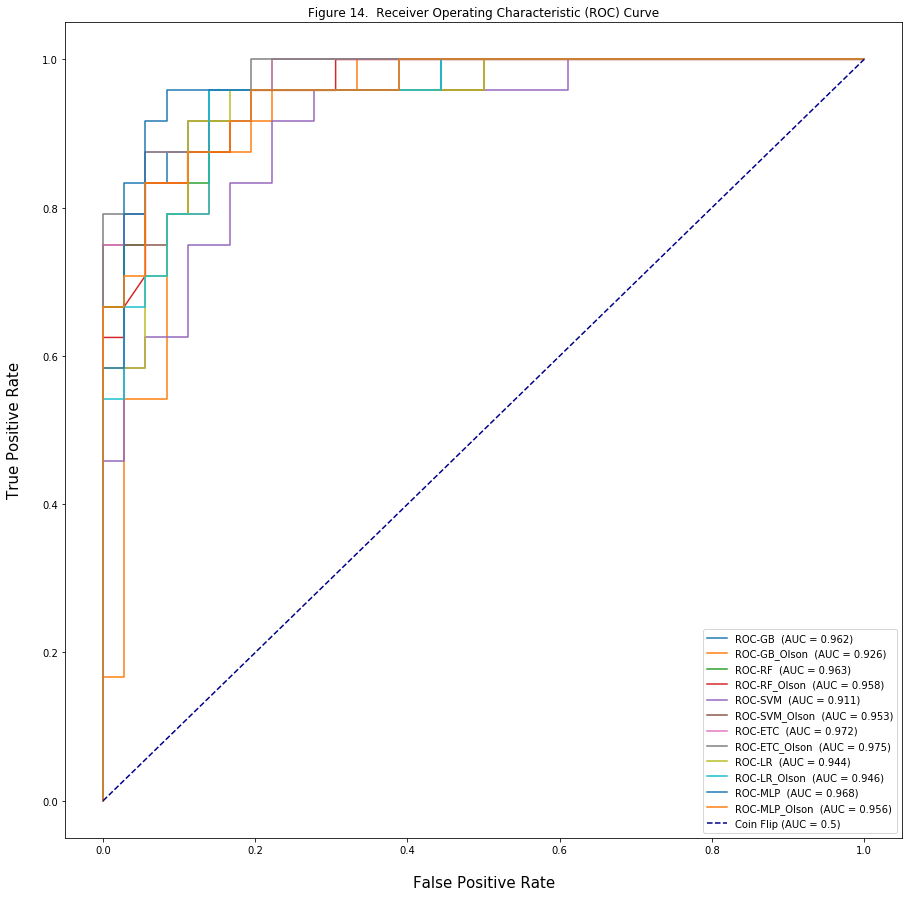

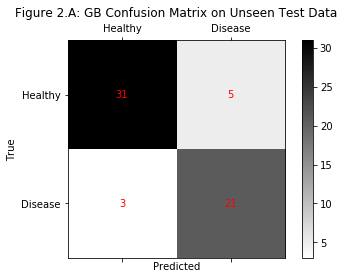

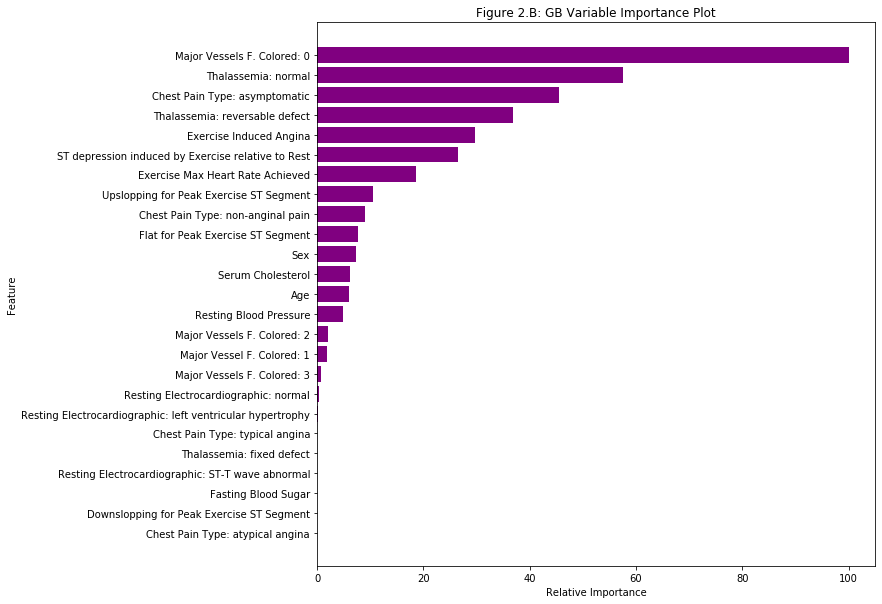

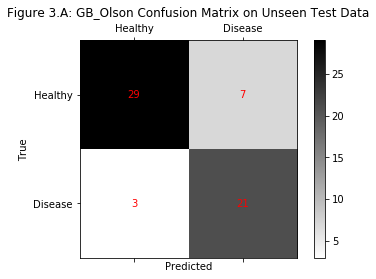

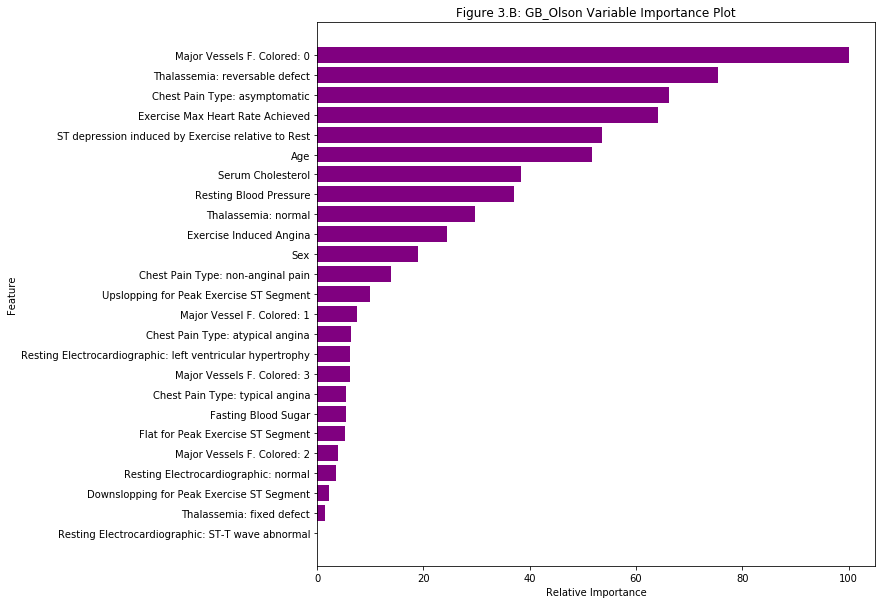

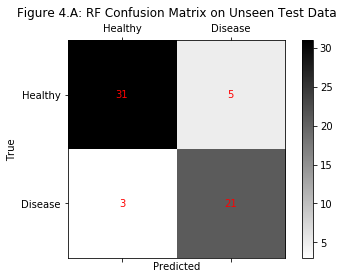

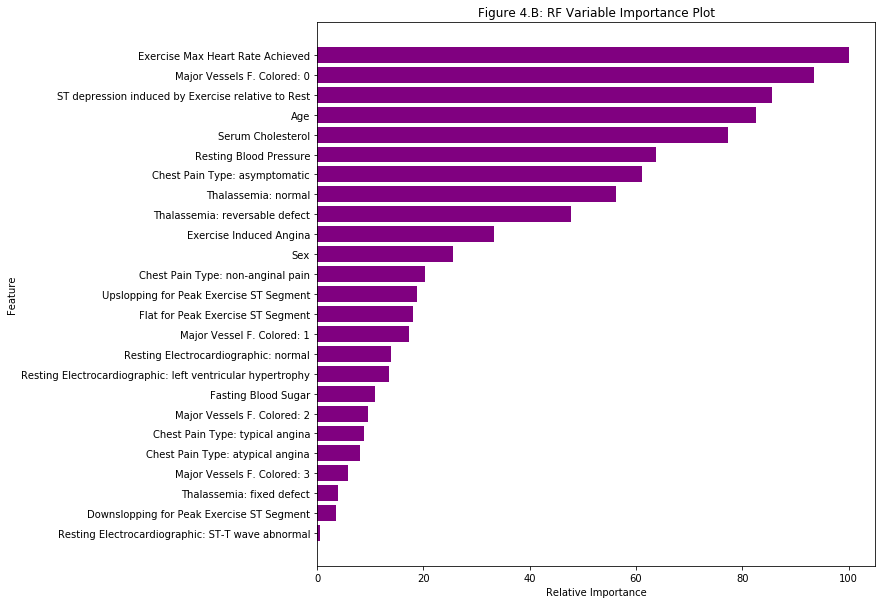

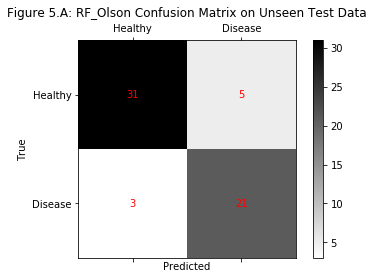

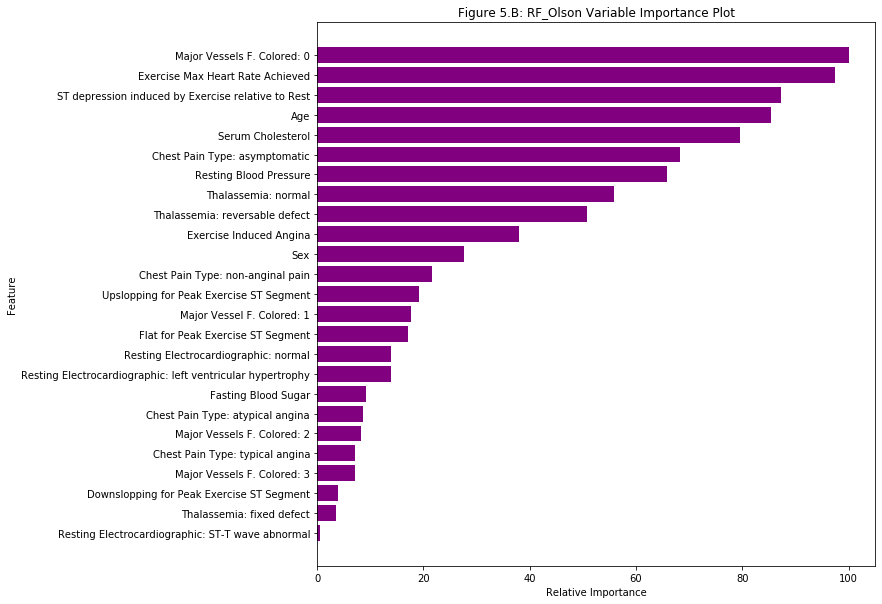

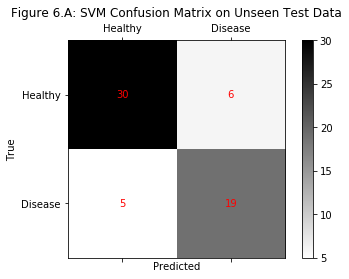

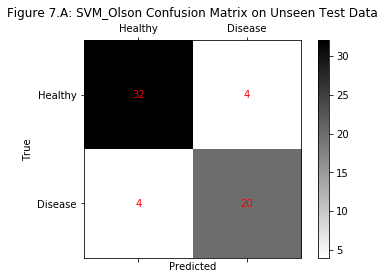

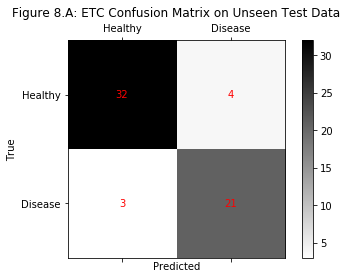

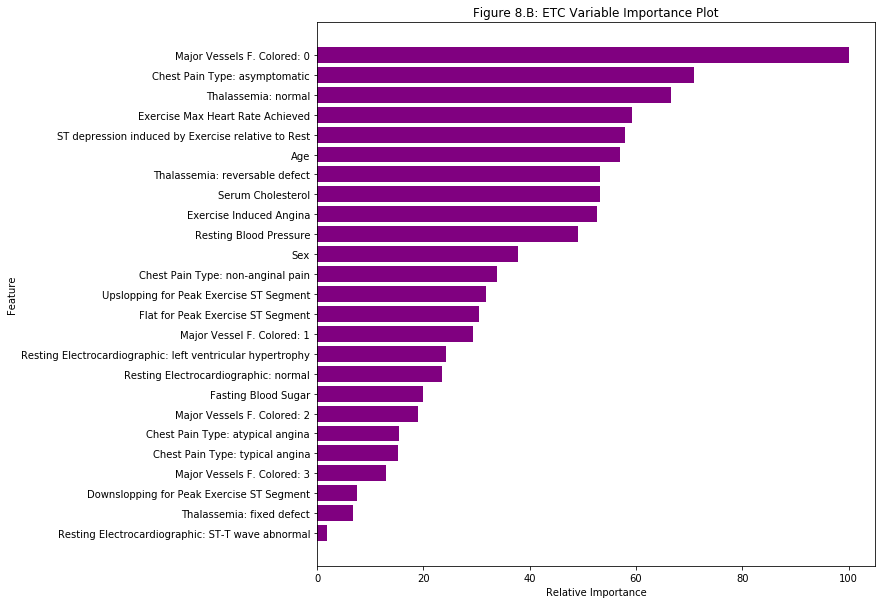

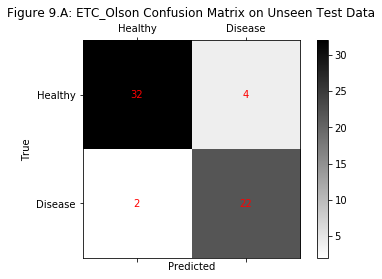

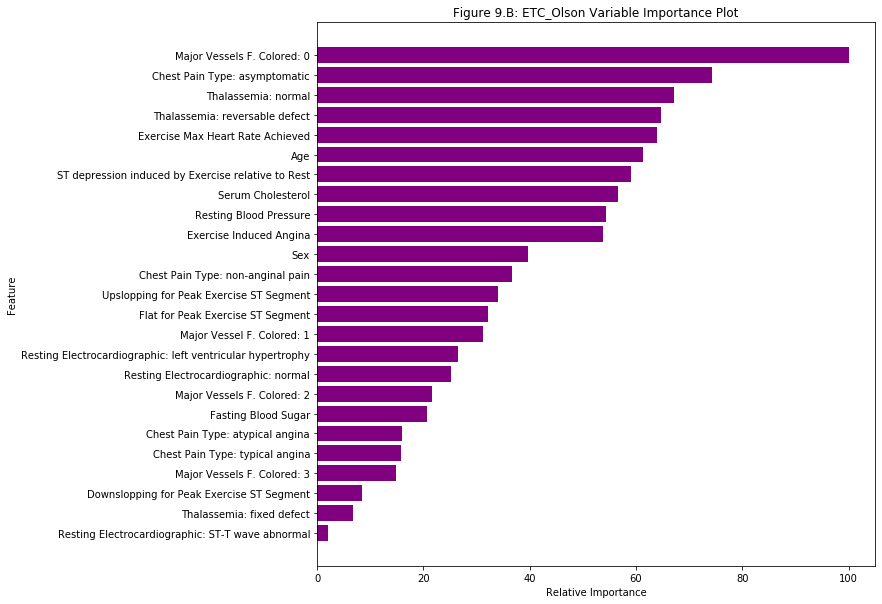

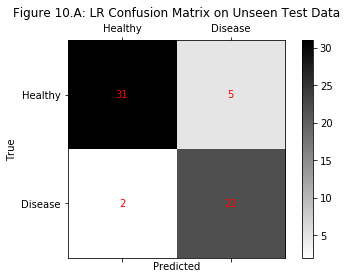

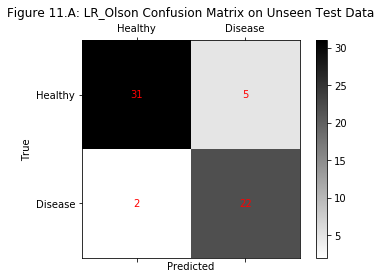

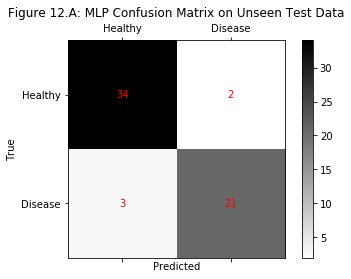

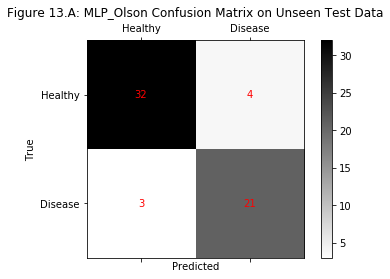

In [62]:
ev_accuracy=[None]*len(models)
ev_name=[None]*len(models)
ev_model=[None]*len(models)
ev_stats=[None]*len(models)
count=1
f, ax2 = plt.subplots(figsize=(15,15))
plt.title('Figure 14.  Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate',size=15,labelpad=20)
plt.ylabel('True Positive Rate',size=15,labelpad=20)
for name, mdl in models.items():
        y_test_ev=y_test
        fper,tper,thresholds = [],[],[]
        ev_accuracy[count-1],ev_name[count-1],ev_model[count-1], ev_stats[count-1] = evaluate_model(figures_path,
                                                                                                    name,
                                                                                                    mdl,
                                                                                                    X_test,
                                                                                                    y_test,
                                                                                                    y_test_ev,
                                                                                                    count+1)
        diagnosis_name={'Healthy':0,'Disease':1}
        y_test['diagnosis']=y_test['diagnosis'].map(diagnosis_name)
        y_pred=pd.DataFrame(mdl.predict_proba(pd.DataFrame(X_test))[:,1])
        fper,tper,thresholds = roc_curve(y_test,y_pred)
        plot_disp = plot_roc_cur(fper,tper,name,ax=ax2)
            
        count=count+1        
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='Coin Flip (AUC = 0.5)')
ax2.legend()
f.savefig(os.path.join(figures_path,'Figure14.png'),dpi=300,bbox_inches='tight')

In [63]:
best_name=ev_name[ev_accuracy.index(max(ev_accuracy))]    #picks the maximum accuracy
print('Best Model:',best_name,'with Accuracy of ',max(ev_accuracy))   
best_model=ev_model[ev_accuracy.index(max(ev_accuracy))]    #picks the maximum accuracy

if best_name == 'RF' or best_name == 'GB' or best_name == 'ETC': 
    # Get numerical feature importances
    importances = list(best_model.feature_importances_)
    importances=100*(importances/max(importances))               
    feature_list = list(X.columns)
    sorted_ID=np.argsort(importances)   
    plt.figure(figsize=[10,10])
    plt.barh(sort_list(feature_list,importances),importances[sorted_ID],align='center')
    plt.title('Figure 8:  Variable Importance Plot -- {}'.format(best_name))
    plt.xlabel('Relative Importance')
    plt.ylabel('Feature') 
    plt.savefig(os.path.join(figures_path,'Figure8.png'),dpi=300,bbox_inches='tight')
    plt.show()

Best Model: MLP with Accuracy of  0.917


# 8. Results & Conclusions <a class="anchor" id="Code_Objective_8"></a>   

### Looking at the Confusion Matrix Plots
#### Figures 2.A, 3.A, 4.A, 5.A, 6.A, 7.A, 8.A, 9.A, 10.A, 11.A, 12.A, and 13.A
   When it comes to diagnosing hear disease, we want to make sure we don't have too many false-positives (you don't have heart disease, but told you do and get treatment) or false-negatives (you have heart disease, but told you don't and don't get treatment). Therefore, the highest overall accuracy model is chosen (the accuracy is the sum of the diagonals on the confusion matrix divided by the total).  You can see that all of the models had less than a handful of false-positives and false-negatives, meaning they were all extremely accurate since there was 60 observations for the test set.   
   
### Looking at the Variable Importance Plots
#### Figures 2.B, 3.B, 4.B, 5.B, 8.B, and 9.B
   Most of the `ensemble` models have a parameter called `predict_proba_`, which allows the output of the most significant features of the model based on their probability through majority vote via either the `gini` index or `entropy`.  These top 5 variables showed up in all of these Variable Importance Plots:
   * `Exercise Max Heart Rate Achieved`
   * `Major Vessels F. Colored: 0`
   * `ST depression induced by Exercise relative to Rest`
   * `Thalassemia: reversable defect`
   * `Thalassemia: normal`

   
It is not a surprise that these same variables also show a high correlation with diagnosis in the Heatmap from Figure 1.  Thus, it makes sense why these variables turned out so important.    

### Looking at Receiver Operating Characteristic (ROC) Curves
#### Figure 14
  All of the model's Receiver Operating Characteristic (ROC) curves had `Excellent` Area Under the Curves (AUC) because their values were greater than 90% (really close to 95% for all), meaning they all would serve as excellent diagnostics.  This is also shown by their high Specificity and Sensitivity values. 
  
### Reflecting on the Recommended Hyperparameters by Olson
  All of the models performed well after fine tuning their hyperparameters, but the best model is the one with the highest overall accuracy.    
  
  In this analysis, `Support Vector Machine (SVM)` won the battle at nearly `91.7` % accuracy.  This is not to say that this is the best model in all cases.  All this means is that for the given test set, this model performed the best.  Out of the 20% of data witheld in this test (60 random individuals), only a couple handfuls were misdiagnosed from all models.  No model is perfect, but I am happy to see how well the recommendations from Olson worked on this data set.  If on average less than a couple handful of people out of 60 are misdiagnosed with such accuracy and precision, that is a good start for making a model.  But obviously we want to find better metrics because in my opinion a couple handfuls is too much to feel comfortable with.

In [64]:
ev_stats=pd.DataFrame(ev_stats)
ev_stats.head(12)

,Name,Accuracy,False Positive [Didnt actually have Heart Disease],False Negative [Actually has Heart Disease!],True Positive,True Negative,Sensitivity,Specificity,Precision,NPV,FPR,FNR
0,GB,0.867,5,3,21,31,0.875,0.861,0.808,0.912,0.139,0.192
1,GB_Olson,0.833,7,3,21,29,0.875,0.806,0.750,0.906,0.194,0.250
2,RF,0.867,5,3,21,31,0.875,0.861,0.808,0.912,0.139,0.192
3,RF_Olson,0.867,5,3,21,31,0.875,0.861,0.808,0.912,0.139,0.192
4,SVM,0.817,6,5,19,30,0.792,0.833,0.760,0.857,0.167,0.240
5,SVM_Olson,0.867,4,4,20,32,0.833,0.889,0.833,0.889,0.111,0.167
6,ETC,0.883,4,3,21,32,0.875,0.889,0.840,0.914,0.111,0.160
7,ETC_Olson,0.900,4,2,22,32,0.917,0.889,0.846,0.941,0.111,0.154
8,LR,0.883,5,2,22,31,0.917,0.861,0.815,0.939,0.139,0.185
9,LR_Olson,0.883,5,2,22,31,0.917,0.861,0.815,0.939,0.139,0.185


# 9. References <a class="anchor" id="Code_Objective_9"></a>

1. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. <a class="anchor" id="Ref_1"></a>   


2. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. <a class="anchor" id="Ref_2"></a>   


3. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. <a class="anchor" id="Ref_3"></a>   


4. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. <a class="anchor" id="Ref_4"></a>   


5. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D. <a class="anchor" id="Ref_5"></a>   


6. Olson, Randal S. et al. “Data-driven advice for applying machine learning to bioinformatics problems.” Pacific Symposium on Biocomputing. Pacific Symposium on Biocomputing 23 (2017): 192-203. <a class="anchor" id="Ref_6"></a>   


7.  SciPy. Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2019) SciPy 1.0–Fundamental Algorithms for Scientific Computing in Python. preprint arXiv:1907.10121 <a class="anchor" id="Ref_7"></a>   


8.  Python. a) Travis E. Oliphant. Python for Scientific Computing, Computing in Science & Engineering, 9, 10–20 (2007) b) K. Jarrod Millman and Michael Aivazis. Python for Scientists and Engineers, Computing in Science & Engineering, 13, 9–12 (2011) <a class="anchor" id="Ref_8"></a>   


9.  NumPy. a) Travis E. Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006). b) Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22–30 (2011) <a class="anchor" id="Ref_9"></a>   


10.  IPython. a) Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21–29 (2007) <a class="anchor" id="Ref_10"></a>   


11.  Matplotlib. J. D. Hunter, “Matplotlib: A 2D Graphics Environment”, Computing in Science & Engineering, vol. 9, no. 3, pp. 90–95, 2007. <a class="anchor" id="Ref_11"></a>   


12.  Pandas. Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51–56 (2010) <a class="anchor" id="Ref_12"></a>   


13. Scikit-Learn. Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825–2830 (2011) <a class="anchor" id="Ref_13"></a>   


14.  Scikit-Image. Stéfan van der Walt, Johannes L. Schönberger, Juan Nunez-Iglesias, François Boulogne, Joshua D. Warner, Neil Yager, Emmanuelle Gouillart, Tony Yu and the scikit-image contributors. scikit-image: Image processing in Python, PeerJ 2:e453 (2014) <a class="anchor" id="Ref_14"></a>   